In [21]:
# import or define evaluate_classification, plot_decision_boundary, plot_data

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
def evaluate_classification(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    return accuracy, report, confusion

In [42]:
def plot_decision_boundary(clf, X, y):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))


    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision boundary')

In [43]:
def plot_data(X, y):
    plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 0')
    plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [44]:
def read_dataset(filename, data_columns, target_column):

    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    return X.values, y.values

In [45]:
class LogisticRegression:

    def __init__(self, standardize=True, 
                 learning_rate=0.01, 
                 max_iter=1000,
                 tol=1e-4,
                 verbose=False):

        self.standardize = standardize
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

    def normalize(self, X):

        # TODO: Implement
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        X_new = (X - mean) / std
        return X_new, mean, std

    def add_intercept(self, X):

        m = X.shape[0]
        ones = np.ones((m, 1))
        X_new = np.column_stack((ones, X))
        return X_new

    def sigmoid(self, z):

        # TODO: Implement
        h = 1 / (1 + np.exp(-z))
        return h
    
    def hypothesis(self, X, theta):

        # TODO: Implement
        z = np.dot(X, theta)
        return self.sigmoid(z)

    def cost_function(self, X, y, theta):

        # TODO: Implement
        m = len(y)
        h = self.hypothesis(X, theta)
        cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost

    def gradient(self, X, y, theta):

        # TODO: Implement
        m = len(y)
        h = self.hypothesis(X, theta)
        grad = (1 / m) * np.dot(X.T, (h - y))
        return grad

    def gradient_descent(self, X, y, theta):

        costs = []
        J = self.cost_function(X, y, theta)
        costs.append(J)

        if self.verbose:
            print(f"Iteration 0 Cost: {J}")

        for i in range(1, self.max_iter + 1):
            # TODO: Implement
            grad = self.gradient(X, y, theta)
            theta = theta - self.learning_rate * grad
            cost = self.cost_function(X, y, theta)
            
            costs.append(cost)

            if i % 100 == 0 and self.verbose:
                print(f"Iteration {i} Cost: {cost}")

            if np.abs(costs[i] - costs[i - 1]) < self.tol or self.max_iter > 10000000000:
                print(f"Converged at iteration {i}")
                break

        return theta, costs
    
    def fit(self, X, y):

        if self.standardize:
            X_new, self.mean, self.std = self.normalize(X)
        X_new = self.add_intercept(X_new)

        self.theta = np.zeros(X_new.shape[1])
        self.theta, self.costs = self.gradient_descent(X_new, y, self.theta)

    def predict(self, X):

        # TODO: Implement
        if self.standardize:
            X_new = (X - self.mean) / self.std 
        X_new = self.add_intercept(X_new)
        h = self.predict_proba(X_new)
        y_pred = (h[:, 1] >= 0.5).astype(int)
        return y_pred

    def predict_proba(self, X):

        # TODO: Implement
        
        h = self.hypothesis(X, self.theta)
        return np.column_stack((1-h, h))

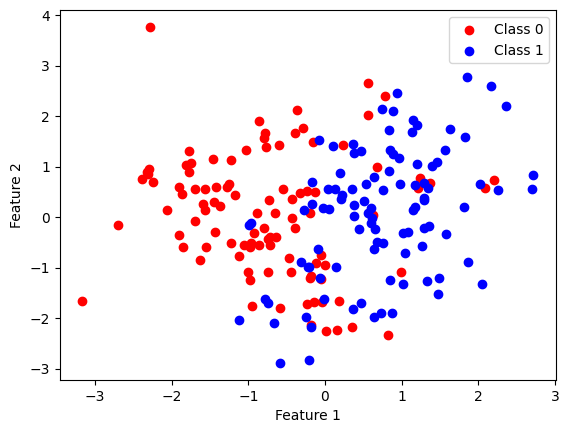

In [46]:
X, y = make_classification(n_samples = 200, n_classes = 2, n_features = 2, 
                           n_informative=2, n_redundant=0, random_state = 42,
                           flip_y=0.02, class_sep=0.8)
plot_data(X, y)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=1000, tol=1e-4, verbose=True)

In [49]:
lr.fit(X_train, y_train)

Iteration 0 Cost: 0.6931471805599454
Iteration 100 Cost: 0.6136961768033276
Iteration 200 Cost: 0.5647623643019382
Iteration 300 Cost: 0.53312832745922
Iteration 400 Cost: 0.5116614899588228
Iteration 500 Cost: 0.4964772879250566
Converged at iteration 585


In [50]:
y_test_pred = lr.predict(X_test)

Accuracy: 
0.85
Report: 
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        22
           1       0.80      0.89      0.84        18

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.86      0.85      0.85        40

Confusion: 
[[18  4]
 [ 2 16]]


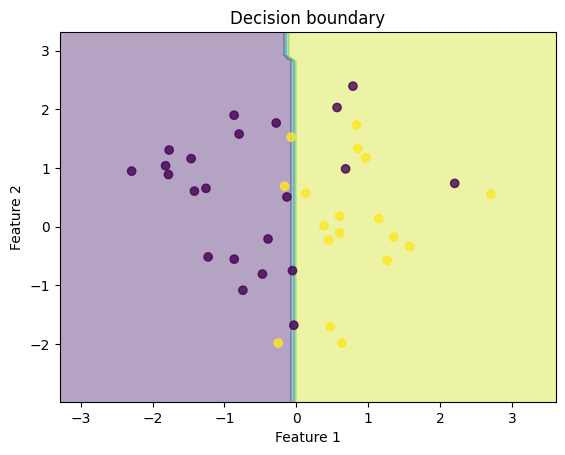

In [51]:
accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X_test, y_test)
plt.show()

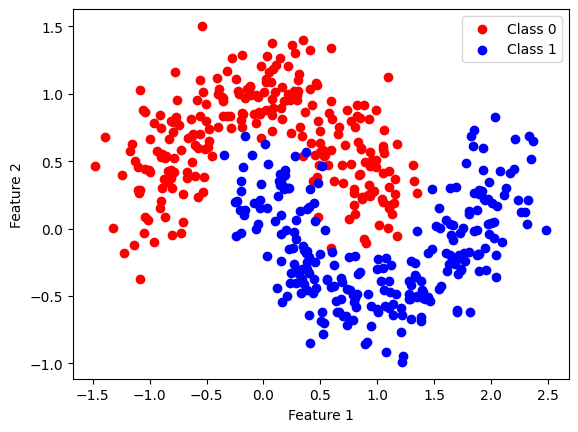

In [52]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
plot_data(X, y)

Iteration 0 Cost: 0.6931471805599452
Iteration 100 Cost: 0.5415343243162286
Iteration 200 Cost: 0.46061214669197326
Iteration 300 Cost: 0.41321437060383104
Iteration 400 Cost: 0.3829955613575733
Iteration 500 Cost: 0.3623983476607546
Iteration 600 Cost: 0.3476178083094182
Converged at iteration 686
Accuracy: 
0.87
Report: 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        43
           1       0.94      0.82      0.88        57

    accuracy                           0.87       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.88      0.87      0.87       100

Confusion: 
[[40  3]
 [10 47]]


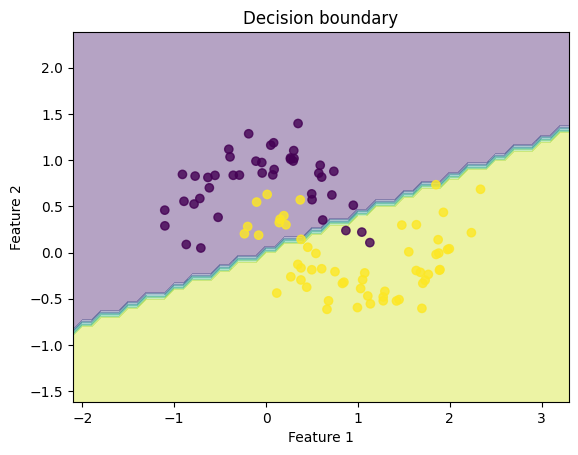

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=1000, tol=1e-4, verbose=True)
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X_test, y_test)
plt.show()

In [55]:
data_columns = ["exam1", "exam2"]
target_column = "submitted"
X, y = read_dataset('sats.csv', data_columns, target_column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 2) (20, 2) (80,) (20,)


Iteration 0 Cost: 0.6931471805599454
Iteration 100 Cost: 0.5689949249776796
Iteration 200 Cost: 0.4902112656368505
Iteration 300 Cost: 0.4373442895637844
Iteration 400 Cost: 0.399805592286781
Iteration 500 Cost: 0.3718465249133423
Iteration 600 Cost: 0.35020589166548044
Iteration 700 Cost: 0.33293265167412034
Iteration 800 Cost: 0.3187994531602904
Iteration 900 Cost: 0.3069992931109112
Converged at iteration 951
Accuracy: 
0.8
Report: 
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20

Confusion: 
[[7 1]
 [3 9]]


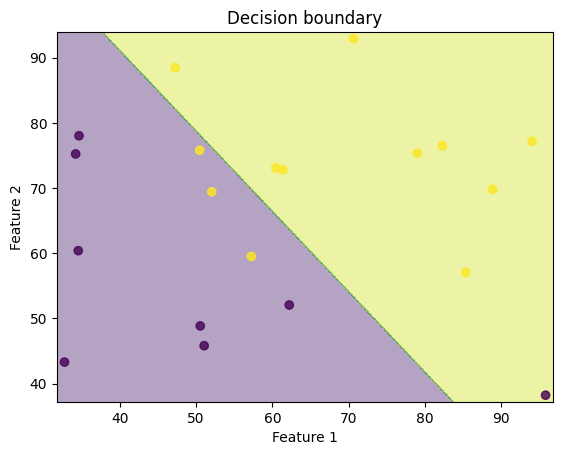

In [56]:
lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=1000, tol=1e-4, verbose=True)
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X_test, y_test)
plt.show()

In [57]:
data_columns = ["test1", "test2"]
target_column = "passed"
X, y = read_dataset('tests.csv', data_columns, target_column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(94, 2) (24, 2) (94,) (24,)


Iteration 0 Cost: 0.6931471805599454
Converged at iteration 1
Accuracy: 
0.4166666666666667
Report: 
              precision    recall  f1-score   support

           0       0.40      0.33      0.36        12
           1       0.43      0.50      0.46        12

    accuracy                           0.42        24
   macro avg       0.41      0.42      0.41        24
weighted avg       0.41      0.42      0.41        24

Confusion: 
[[4 8]
 [6 6]]


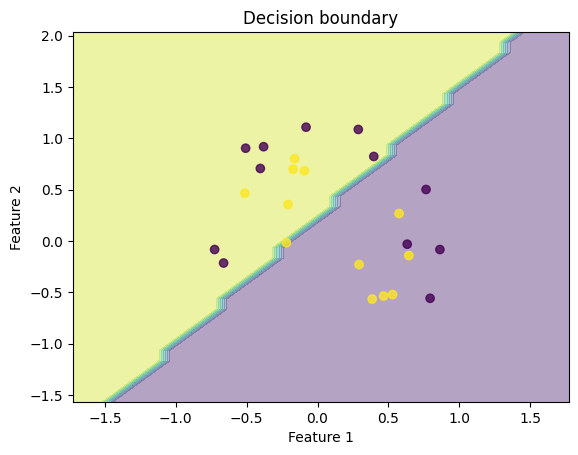

In [58]:
lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=1000, tol=1e-4, verbose=True)
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X_test, y_test)
plt.show()

In [59]:
data_columns = ["test1", "test2"]
target_column = "passed"
X, y = read_dataset('tests.csv', data_columns, target_column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
print(X_train_poly.shape, X_test_poly.shape, y_train.shape, y_test.shape)

(94, 2) (24, 2) (94,) (24,)
(94, 5) (24, 5) (94,) (24,)


In [61]:
lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=1000, tol=1e-4, verbose=True)
lr.fit(X_train_poly, y_train)
y_test_pred = lr.predict(X_test_poly)
print(y_test_pred)
accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")

Iteration 0 Cost: 0.6931471805599454
Iteration 100 Cost: 0.647320919837375
Iteration 200 Cost: 0.6146097864169219
Iteration 300 Cost: 0.5894574086763105
Iteration 400 Cost: 0.5690653856925529
Iteration 500 Cost: 0.5519359254964304
Iteration 600 Cost: 0.5371996884975321
Iteration 700 Cost: 0.5243107835922122
Iteration 800 Cost: 0.5129019684220674
Converged at iteration 868
[1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1]
Accuracy: 
0.7916666666666666
Report: 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.82      0.75      0.78        12

    accuracy                           0.79        24
   macro avg       0.79      0.79      0.79        24
weighted avg       0.79      0.79      0.79        24

Confusion: 
[[10  2]
 [ 3  9]]
